# SAN FRANCISCO SALARIES | Exploratory Data Analysis

## Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#

# San Francisco Salaries Dataset on Kaggle
### Data Source: https://www.kaggle.com/datasets/kaggle/sf-salaries?resource=download

#

## Importing The CSV. File

In [71]:
df = pd.read_csv(r"C:\Users\mosta\Downloads\archive (4)\Salaries.csv")

In [72]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Data Preperation & Exploration

In [73]:
# Defining missing values analysis function

def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending = True)
    ratio_ = (df[na_columns].isnull().sum() / df.shape[0]*100).sort_values(ascending = True)
    missing_df = pd.concat([n_miss , np.round(ratio_,2)], axis = 1, keys=['Missing Values','Ratio'])
    return missing_df

# Defining Overview function

def dataframe_overview(df, head=5, tail=5):
    print('SHAPE'.center(82,'~'))
    print('Row: {}'.format(df.shape[0]))
    print('Column: {}'.format(df.shape[1]))
    print('TYPES'.center(82,'~'))
    print(df.dtypes)
    print('MISSING VALUES'.center(82,'~'))
    print(missing_values_analysis(df))
    print('DUPLICATION'.center(83,'~'))
    print(df.duplicated().sum())
    print('QUANTILES'.center(82,'~'))
    print(df.describe())

#
# DATA OVERVIEW |
#

In [74]:
dataframe_overview(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Row: 148654
Column: 13
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~MISSING VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          Missing Values   Ratio
BasePay              605    0.41
Benefits           36159   24.32
Status            110535   74.36
Notes             148654  100.00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATION~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                

#
# Data Transformation |
#

## Dropping Redundant Columns

In [75]:
df.drop(columns = 'Notes', inplace = True)

## Data Types Modifications


In [76]:
#####  BASEPAY  ######### 

# Check 'Not Provided' records

print((df['BasePay']=='Not Provided').sum())

# Decision: Drop 4 'Not Provided' records

df = df[df['BasePay']!='Not Provided']

# Converting to float
df['BasePay']= df['BasePay'].astype('float')


4


In [77]:
#######  OvertimePay  ######### 

# Converting to float
df['OvertimePay']= df['OvertimePay'].astype('float')

In [78]:
#######  OtherPay  ######### 

# Converting to float
df['OtherPay'] = df['OtherPay'].astype('float')

In [79]:
#######  Benefits  ######### 

# Converting to float
df['Benefits']= df['Benefits'].astype('float')

#
# Data Cleaning |
#

## Dealing with NaN Values

In [80]:
#######  BasePay  ######### 


# Missing Data Ratio is 0.41% < 5%

# Decision: Drop NaN

# Droping NaN values 

df.dropna(subset = 'BasePay', inplace = True)



In [81]:
#######  Benefits & Status & Notes  ######### 


# Missing Data Ratio is around 24%

# Decision: Leave the NaN values; Plausible NaNs

## Dealing with Data Formats

In [82]:
df['EmployeeName'] = df['EmployeeName'].str.title()
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,Nathaniel Ford,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,Gary Jimenez,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,Albert Pardini,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,Christopher Chong,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,Patrick Gardner,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


## Dealing with The Outliers 

In [83]:
##### BasePay ######

Q1 = np.quantile(df['BasePay'],0.25)
Q3 = np.quantile(df['BasePay'],0.75)

from scipy.stats import iqr

IQR = iqr(df['BasePay'])

BasePay_Upper = Q3 + 1.5 * IQR
BasePay_Lower = Q1 - 1.5 * IQR

print('BasePay_Upper: {}'.format(BasePay_Upper))
print('BasePay_Lower: {}'.format(BasePay_Lower))
print('Outliers: {}'.format(((df['BasePay']< BasePay_Lower) | (df['BasePay']> BasePay_Upper)).sum()))

BasePay_Upper: 186345.325
BasePay_Lower: -58066.07500000001
Outliers: 1037


In [84]:
df = df[(df['BasePay']> BasePay_Lower) & (df['BasePay'] < BasePay_Upper) ]
df = df[df['BasePay']>0]

In [85]:
##### OvertimePay ######

Q1 = np.quantile(df['OvertimePay'],0.25)
Q3 = np.quantile(df['OvertimePay'],0.75)

from scipy.stats import iqr

IQR = iqr(df['BasePay'])

OvertimePay_Upper = Q3 + 1.5 * IQR
OvertimePay_Lower = Q1 - 1.5 * IQR

print('OvertimePay_Upper: {}'.format(OvertimePay_Upper))
print('OvertimePay_Lower: {}'.format(OvertimePay_Lower))
print('Outliers: {}'.format(((df['OvertimePay']< OvertimePay_Lower) | (df['OvertimePay']> OvertimePay_Upper)).sum()))

OvertimePay_Upper: 93801.8175
OvertimePay_Lower: -88976.0175
Outliers: 183


In [86]:
df = df[(df['OvertimePay']> OvertimePay_Lower) & (df['OvertimePay'] < OvertimePay_Upper) ]
df = df[df['OvertimePay']>0]

#
# The Analysis |

## What is the average Base Pay?

Average BasePay: 73871.45833636505


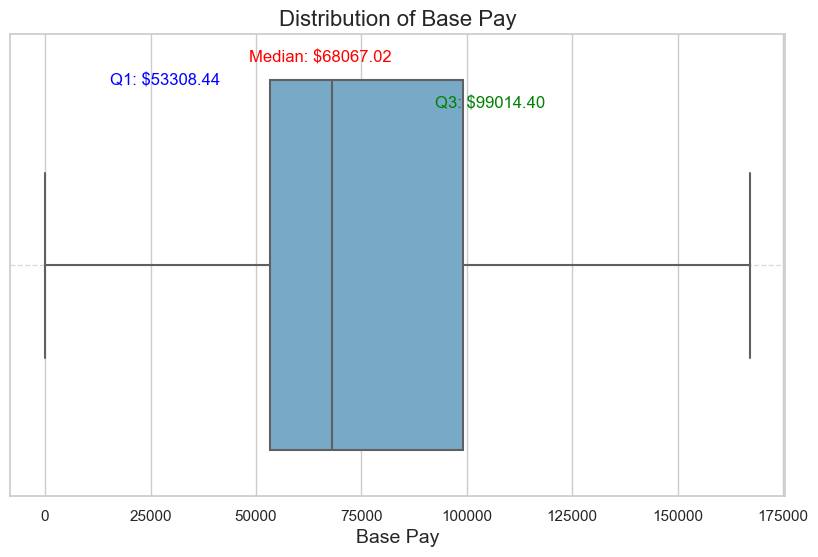

,index,BasePay
0,count,70917.000000
1,mean,73871.458336
2,std,34094.522269
3,min,31.360000
4,25%,53308.440000
5,50%,68067.020000
6,75%,99014.400000
7,max,186322.150000


In [87]:
print('Average BasePay: {}'.format(df['BasePay'].mean()))

# Set a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Use a color palette for better distinction
color_palette = sns.color_palette("Blues", n_colors=1)

# Set a white grid for better readability
sns.set(style="whitegrid")

# Create the boxplot
ax = sns.boxplot(x='BasePay', data=df, color=color_palette[0], sym = "")

# Add a title
plt.title('Distribution of Base Pay', fontsize=16)

# Customize x-axis label
plt.xlabel('Base Pay', fontsize=14)


# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

medians = df['BasePay'].median()
q1 = df['BasePay'].quantile(0.25)
q3 = df['BasePay'].quantile(0.75)

ax.annotate(f'Median: ${medians:.2f}', xy=(0.4, 0.95), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='red')

ax.annotate(f'Q1: ${q1:.2f}', xy=(0.20, 0.9), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='blue')

ax.annotate(f'Q3: ${q3:.2f}', xy=(0.62, 0.85), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='green')

# Show the plot
plt.show()

df['BasePay'].describe().reset_index()

## What Is The Highest Amount of OvertimePay?

The Highest Amount of Overtime Pay recorded: $93700.89


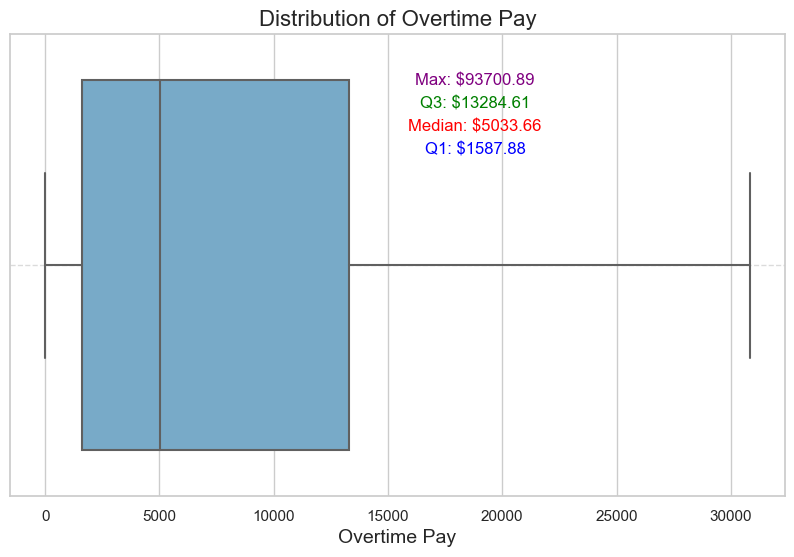

,index,OvertimePay
0,count,70917.000000
1,mean,10301.065638
2,std,13687.250439
3,min,0.020000
4,25%,1587.880000
5,50%,5033.660000
6,75%,13284.610000
7,max,93700.890000


In [88]:
print("The Highest Amount of Overtime Pay recorded: ${}".format(df['OvertimePay'].max()))


# Set a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Use a color palette for better distinction
color_palette = sns.color_palette("Blues", n_colors=1)

# Set a white grid for better readability
sns.set(style="whitegrid")

# Create the boxplot
zx = sns.boxplot(x='OvertimePay', data=df, color=color_palette[0], sym="")

# Add a title
plt.title('Distribution of Overtime Pay', fontsize=16)

# Customize x-axis label
plt.xlabel('Overtime Pay', fontsize=14)


# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add an annotation for the max value
max_value = df['OvertimePay'].max()
medians = df['OvertimePay'].median()
q1 = df['OvertimePay'].quantile(0.25)
q3 = df['OvertimePay'].quantile(0.75)

zx.annotate(f'Median: ${medians:.2f}', xy=(0.6, 0.80), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='red')

zx.annotate(f'Q1: ${q1:.2f}', xy=(0.6, 0.75), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='blue')

zx.annotate(f'Q3: ${q3:.2f}', xy=(0.6, 0.85), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='green')

zx.annotate(f'Max: ${max_value:.2f}', xy=(0.6, 0.90), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, color='purple')

# Show the plot
plt.show()

df["OvertimePay"].describe().reset_index()


## What Is The Job Titles Of Josephs?

In [119]:
#df[['EmployeeName','JobTitle']][df["EmployeeName"].str.contains('^Joseph')]
df[['EmployeeName','JobTitle']].query("EmployeeName.str.contains('^Joseph')")

,EmployeeName,JobTitle
297,Josephine Rapadas,NURSE MANAGER
532,Joseph Fischer-Iii,SERGEANT III (POLICE DEPARTMENT)
552,Joseph Fong,"INSPECTOR III, (POLICE DEPARTMENT)"
561,Joseph Mayers,POLICE OFFICER III
605,Joseph Engler,LIEUTENANT III (POLICE DEPARTMENT)
...,...,...
140288,Joseph J Parafina,Automotive Machinist
140406,Joseph Alhayawa,Custodial Assistant Supervisor
141081,Joseph M Keahey,EMT/Paramedic/Firefighter
142159,Joseph J Fernandes,Museum Guard


In [106]:
df[['EmployeeName','JobTitle', 'TotalPayBenefits']].query("EmployeeName == 'Joseph Fong'").sort_values('TotalPayBenefits',ascending = False)

,EmployeeName,JobTitle,TotalPayBenefits
110863,Joseph Fong,Lieutenant 3,264352.90
37868,Joseph Fong,Inspector 3,210761.60
552,Joseph Fong,"INSPECTOR III, (POLICE DEPARTMENT)",184174.36


## Who Is The Highest Paid Employee?

In [120]:
df[['EmployeeName','TotalPayBenefits']].query("TotalPayBenefits == TotalPayBenefits.max() ")

,EmployeeName,TotalPayBenefits
72939,Marty A Ross,371608.35


## Who Is The Lowest Paid Employee?

In [122]:
df[['EmployeeName','JobTitle','TotalPayBenefits']].query("TotalPayBenefits == TotalPayBenefits.min() ")

,EmployeeName,JobTitle,TotalPayBenefits
35993,Jeanette Jummati,TESTING TECHNICIAN,168.65


## What Is The Average/Mean BasePay per Year?

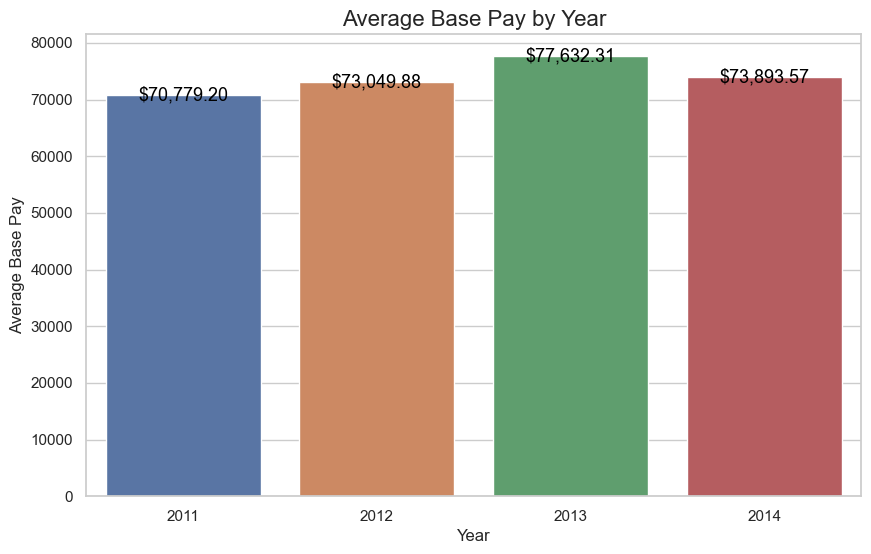

,Year,BasePay
0,2011,70779.197422
1,2012,73049.877353
2,2013,77632.307414
3,2014,73893.566148


In [161]:
Avg_BasePay_Year = df.groupby("Year")['BasePay'].mean().reset_index().sort_values('Year')
Avg_BasePay_Year

plt.figure(figsize=(10, 6))


sns.set(style="whitegrid")  # Optional: Set a white grid background for better readability

# Create a vertical bar plot
br = sns.barplot(data=Avg_BasePay_Year, x='Year', y='BasePay')

# Annotate the bars with their values
for p in br.patches:
    br.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=13, color='black')

# Set plot title
plt.title('Average Base Pay by Year', fontsize=16)

# Set axis labels
plt.xlabel('Year')
plt.ylabel('Average Base Pay')

# Show the plot
plt.show()


Avg_BasePay_Year

## Top 5 Most Common Job Titles in San Francisco

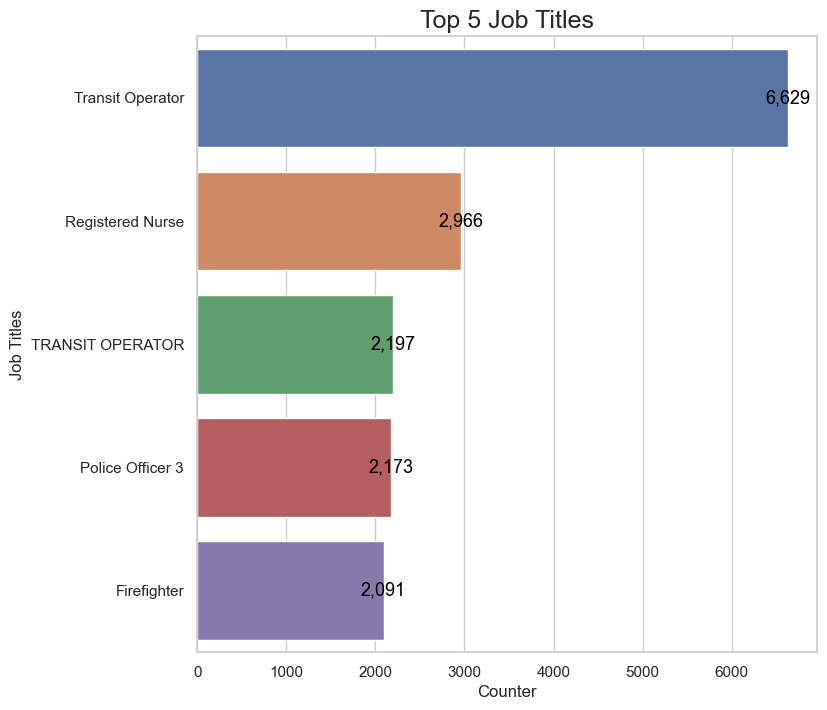

,index,JobTitle
0,Transit Operator,6629
1,Registered Nurse,2966
2,TRANSIT OPERATOR,2197
3,Police Officer 3,2173
4,Firefighter,2091


In [183]:
Top5_JobTitles = df['JobTitle'].value_counts().reset_index().sort_values('JobTitle', ascending = False)

plt.figure(figsize=(8, 8))


sns.set(style="whitegrid")  # Optional: Set a white grid background for better readability

# Create a horizontal bar plot
bar_plot = sns.barplot(data=Top5_JobTitles[:5], x='JobTitle', y='index', orient='h')

# Annotate the bars with their values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='center', va='center', fontsize=13, color='black')

# Set plot title
plt.title('Top 5 Job Titles', fontsize=18)

# Set axis labels
plt.xlabel('Counter')
plt.ylabel('Job Titles')

# Show the plot
plt.show()


Top5_JobTitles[:5]

## Top 5 Least Job Titles in San Francisco

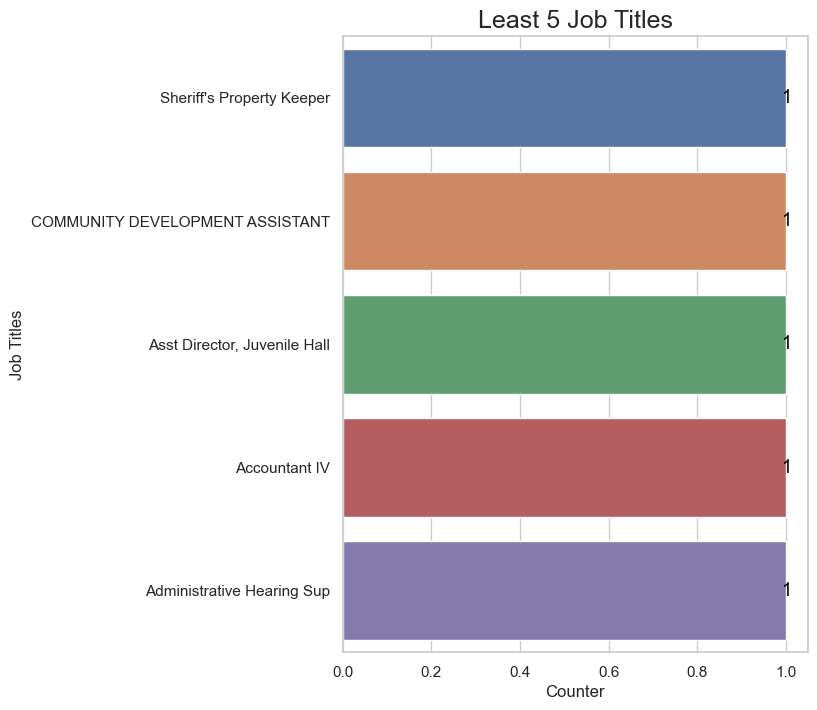

,index,JobTitle
1207,Sheriff's Property Keeper,1
1092,COMMUNITY DEVELOPMENT ASSISTANT,1
1091,"Asst Director, Juvenile Hall",1
1090,Accountant IV,1
1089,Administrative Hearing Sup,1


In [186]:
Least5_JobTitles = df['JobTitle'].value_counts().reset_index().sort_values('JobTitle')

plt.figure(figsize=(6, 8))


sns.set(style="whitegrid")  # Optional: Set a white grid background for better readability

# Create a horizontal bar plot
bar_plot_least = sns.barplot(data=Least5_JobTitles[:5], x='JobTitle', y='index', orient='h')

# Annotate the bars with their values
for p in bar_plot_least.patches:
    bar_plot_least.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='center', va='center', fontsize=13, color='black')

# Set plot title
plt.title('Least 5 Job Titles', fontsize=18)

# Set axis labels
plt.xlabel('Counter')
plt.ylabel('Job Titles')

# Show the plot
plt.show()


Least5_JobTitles[:5]

## How Many Job Titles Represented only once in 2013?

In [212]:
(df[df['Year']==2013]['JobTitle'].value_counts() == 1).sum()

108

## How Many Has The Word 'Chief' in their Job Titles?

In [237]:
df['JobTitle'].str.lower().str.contains('chief').sum()

238

#
# Thank You!
## Mostafa Fahmi